In [2]:
using Random

In [3]:
Random.seed!(1)

TaskLocalRNG()

In [4]:
function pi(n::Int)
    dots_circle = 0
    for i in 1:n
        X = rand()
        Y = rand()
        dist = sqrt(X^2 + Y^2) 
        if dist < 1 
            dots_circle += 1
        end
    end
    return (4*dots_circle)/n
end

pi (generic function with 1 method)

In [5]:
for k in 1:6
    println(pi(10^k))
end

3.6
2.8
3.176
3.1364
3.13472
3.141672


In [6]:
import Pkg
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


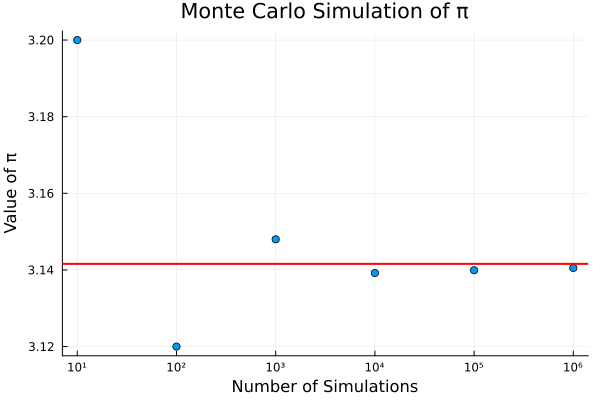

In [7]:
using Plots
x = [10, 100, 1000, 10000, 100000, 1000000]
y = [pi(n) for n in x]

scatter(x, y, xscale=:log10, xticks = ([10, 100, 1000, 10000, 100000, 1000000], ["10¹","10²","10³","10⁴","10⁵","10⁶"]), 
        xlab="Number of Simulations", ylab="Value of π", title="Monte Carlo Simulation of π", legend=false)
hline!([π], color=:red, lw=2)

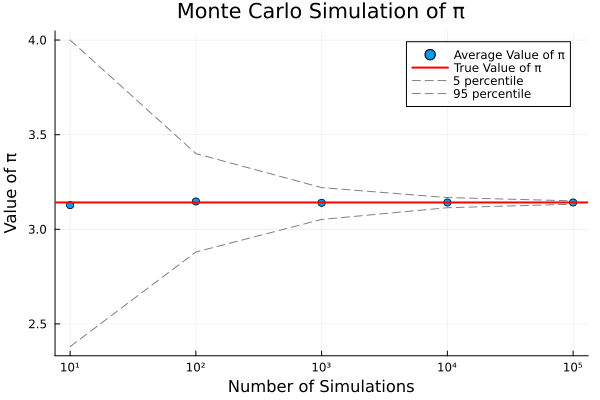

In [8]:
using Statistics

means = []
pct_5 = []
pct_95 = []
for k in 1:5
    pies = [pi(10^k) for _ in 1:1000]
    push!(means, mean(pies))
    push!(pct_5, quantile(pies, 0.05))
    push!(pct_95, quantile(pies, 0.95))
end

x = 10 .^ (1:5)

scatter(x, means, xscale=:log10, xticks = (10 .^ (1:5), ["10¹","10²","10³","10⁴","10⁵","10⁶"]), xlab="Number of Simulations",
        ylab="Value of π", title="Monte Carlo Simulation of π", label = "Average Value of π")
hline!([π], label = "True Value of π", color=:red, lw=2,)
plot!(x, pct_5; label="5 percentile", lw=1, ls=:dash, color=:gray)
plot!(x, pct_95; label="95 percentile", lw=1, ls=:dash, color=:gray)